## EDA and creation of (first) plots

In [382]:
# import all libraries which can be helpful down the road
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import missingno as msno

In [81]:
# Data type has to be set again, because it is "lost" during saving and importing the data in/from csv-file
df = pd.read_csv('data/cleaned_realestate.csv', sep=";")
df['yr_renovated'] = df['yr_renovated'].astype(pd.Int64Dtype())
df.describe()

,prop_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,transaction_id
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,744.0,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,...,285.748993,1970.999676,1995.928763,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05,10799.000000
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,...,439.824566,29.375234,15.599946,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05,6234.661218
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,1900.000000,1934.0,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04,1.000000
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,1987.0,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05,5400.000000
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,2000.0,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05,10799.000000
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,550.000000,1997.000000,2007.25,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,16198.000000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,21597.000000


In [82]:
df.head()

,prop_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,transaction_id
0,7129300520,3.0,1.00,1180,5650,1.0,0,0,3,7,...,1955,<NA>,98178,47.5112,-122.257,1340,5650,2014-10-13,221900,1
1,6414100192,3.0,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,538000,2
2,5631500400,2.0,1.00,770,10000,1.0,0,0,3,6,...,1933,<NA>,98028,47.7379,-122.233,2720,8062,2015-02-25,180000,3
3,2487200875,4.0,3.00,1960,5000,1.0,0,0,5,7,...,1965,<NA>,98136,47.5208,-122.393,1360,5000,2014-12-09,604000,4
4,1954400510,3.0,2.00,1680,8080,1.0,0,0,3,8,...,1987,<NA>,98074,47.6168,-122.045,1800,7503,2015-02-18,510000,5


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prop_id         21597 non-null  int64  
 1   bedrooms        21597 non-null  float64
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   floors          21597 non-null  float64
 6   waterfront      21597 non-null  int64  
 7   view            21597 non-null  int64  
 8   condition       21597 non-null  int64  
 9   grade           21597 non-null  int64  
 10  sqft_above      21597 non-null  int64  
 11  sqft_basement   21597 non-null  int64  
 12  yr_built        21597 non-null  int64  
 13  yr_renovated    744 non-null    Int64  
 14  zipcode         21597 non-null  int64  
 15  lat             21597 non-null  float64
 16  long            21597 non-null  float64
 17  sqft_living15   21597 non-null 

##### Data from all available columns is visualized by box plots to get a (good) first impression of the data set. 
For some columns, e.g. prop_id, this makes no sense, but it does not hurt either. More tah enough sensible plots are created by this method.

C:\Users\Roland\AppData\Local\Temp\ipykernel_1200\3996366782.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



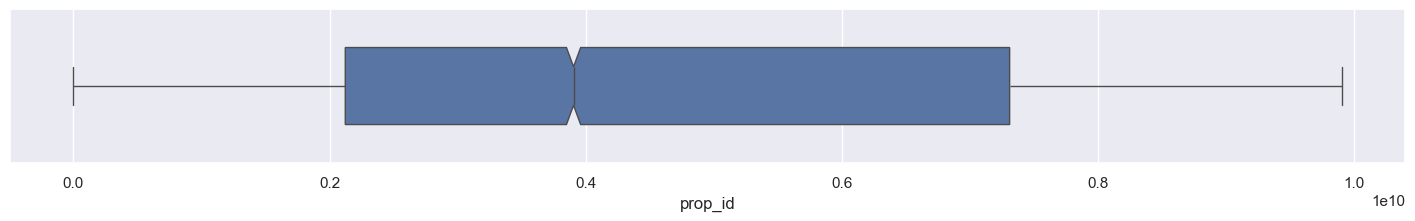

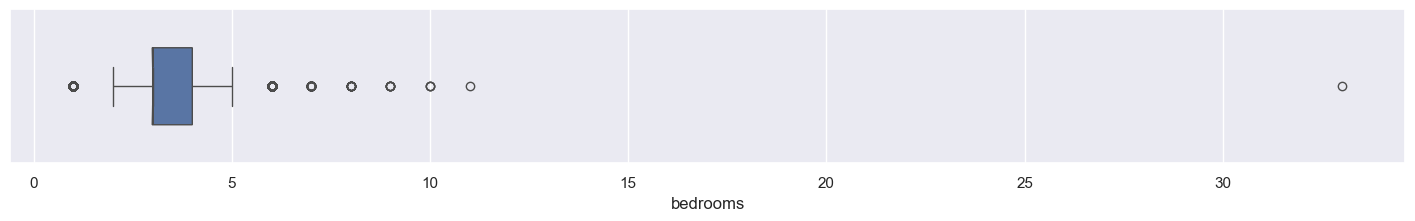

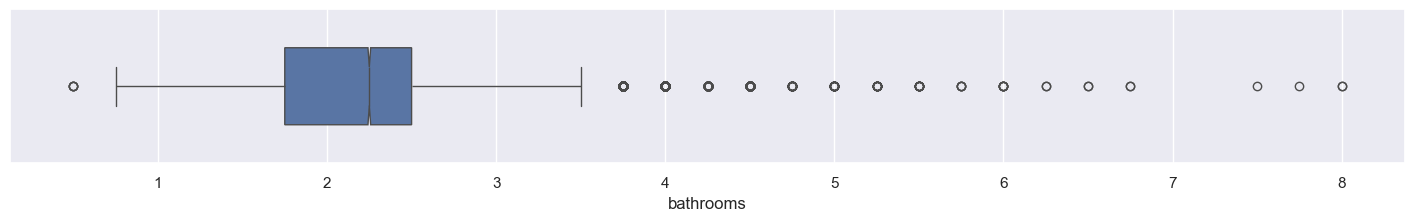

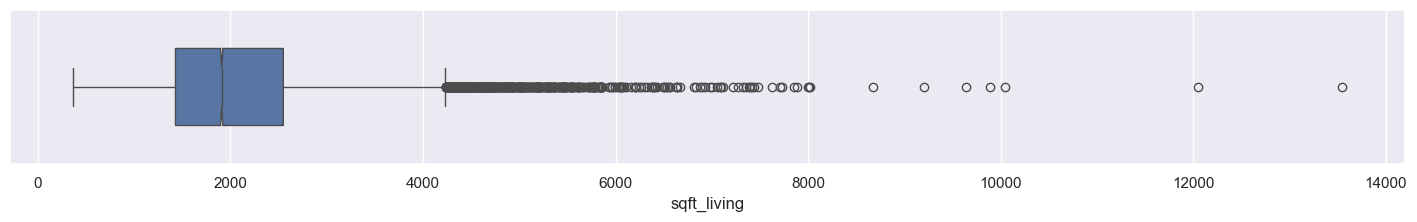

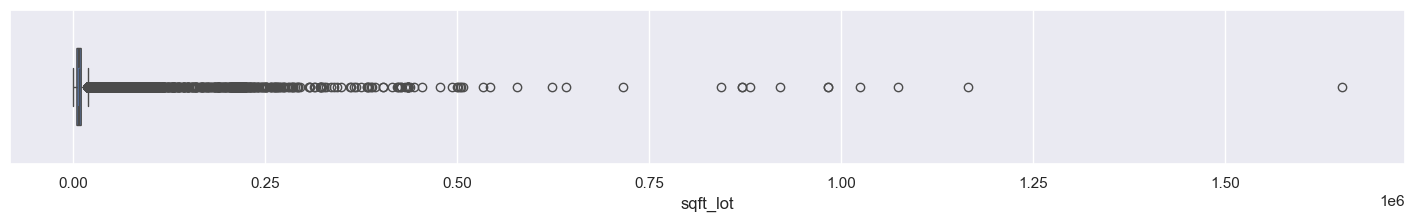

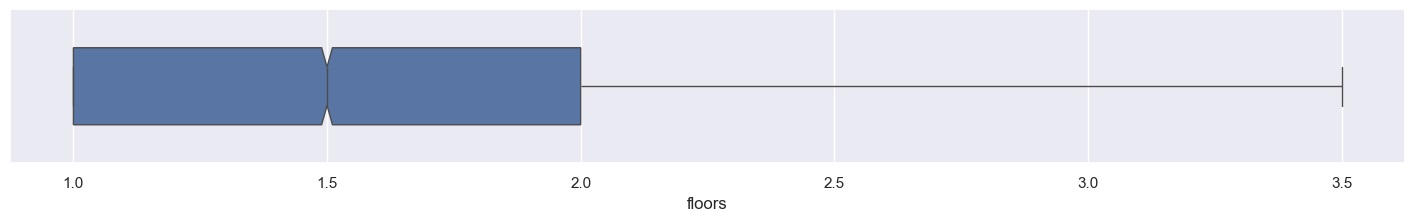

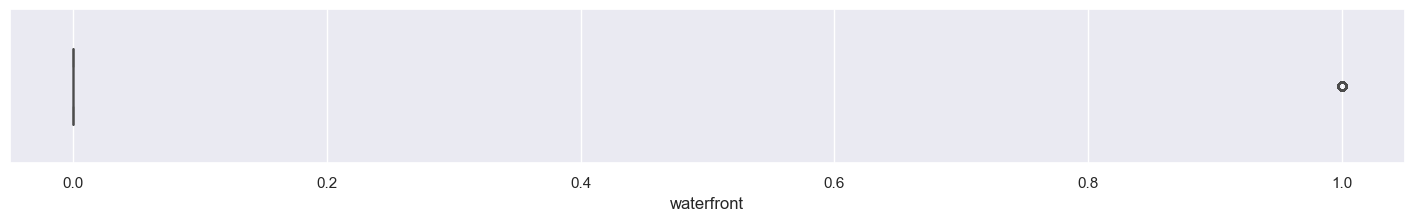

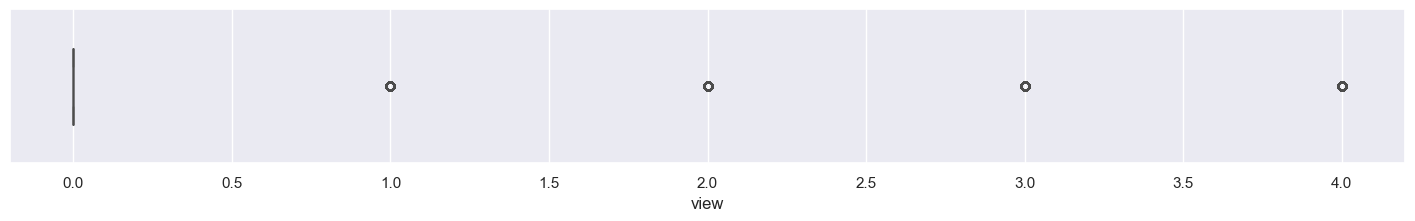

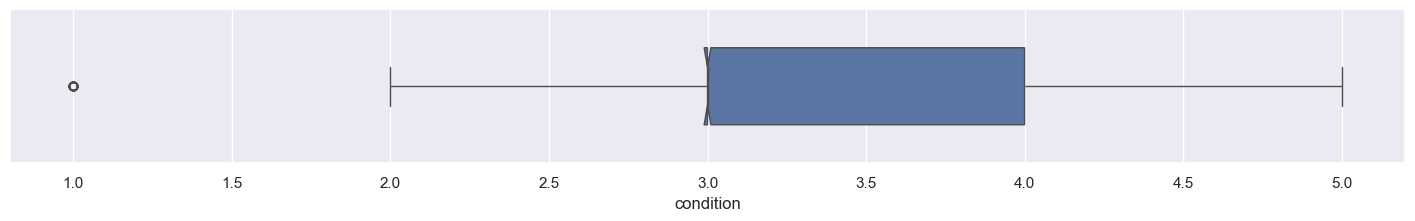

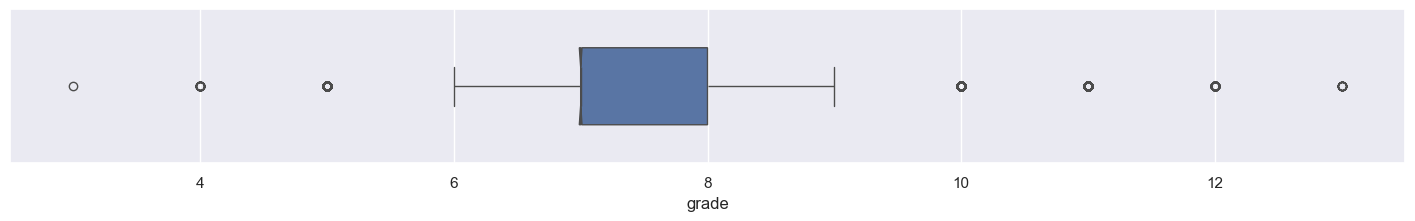

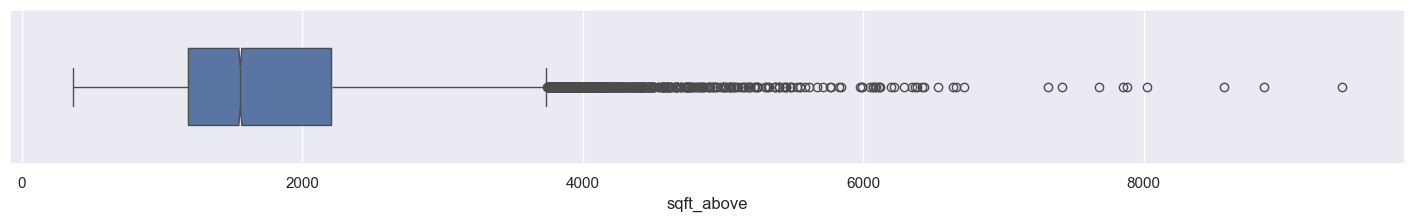

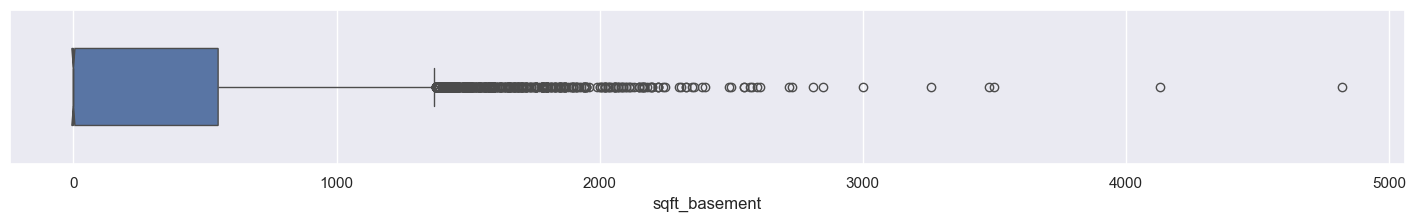

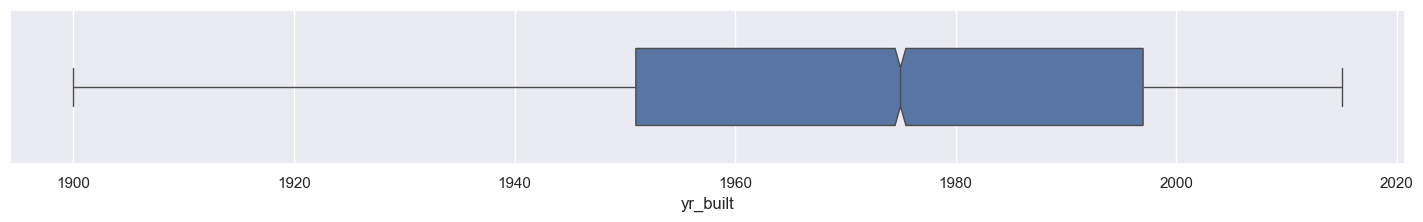

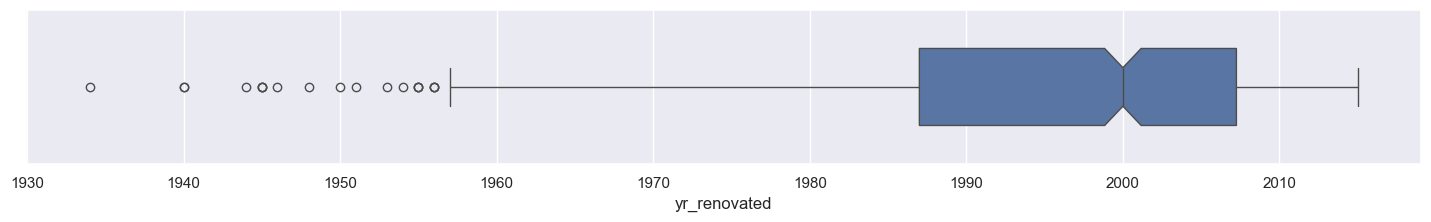

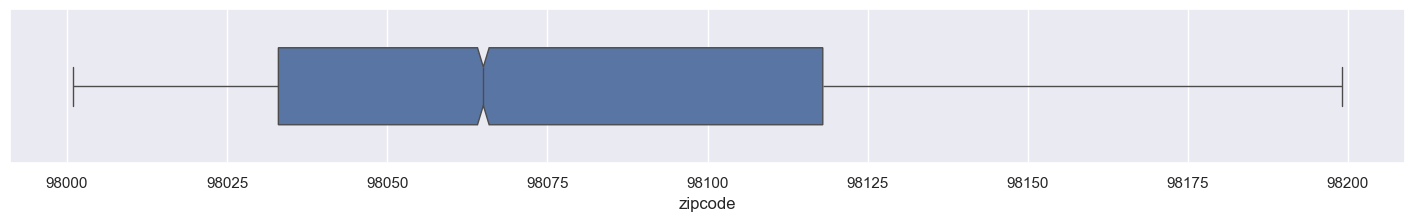

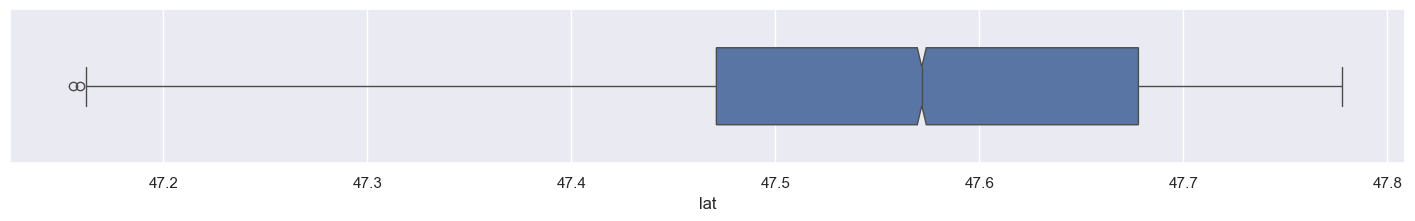

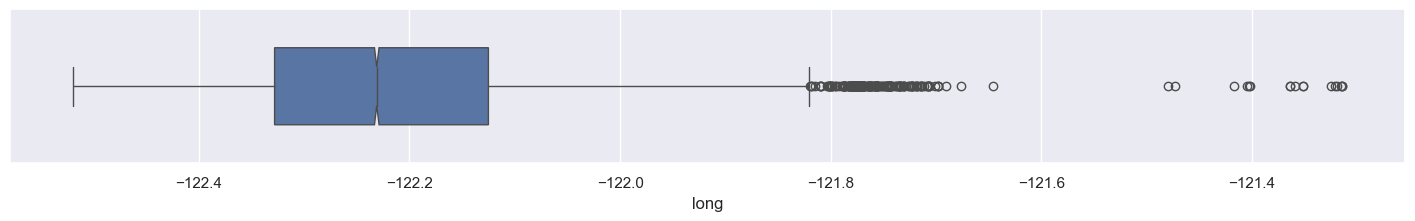

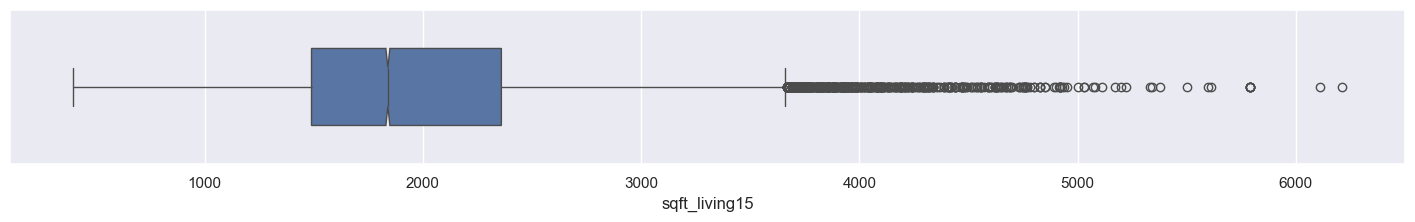

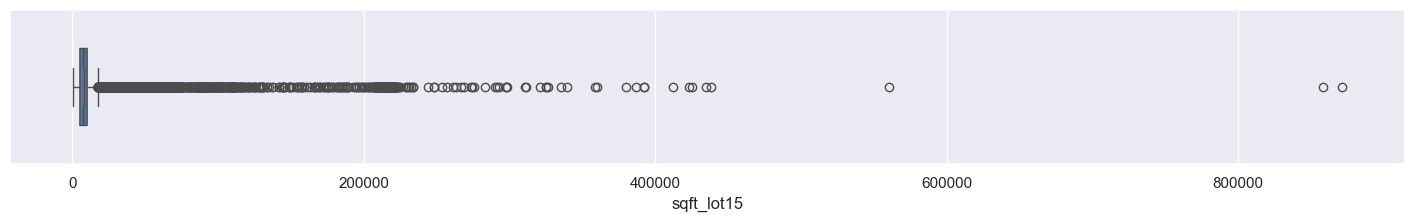

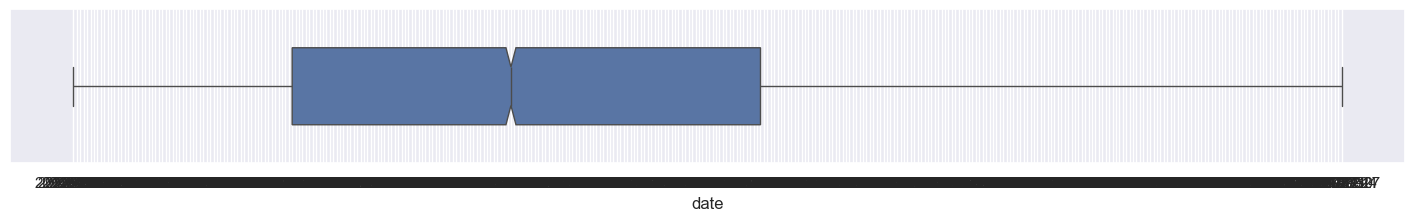

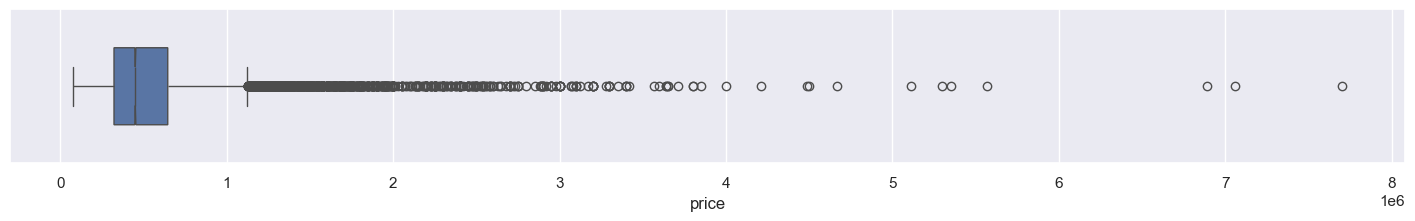

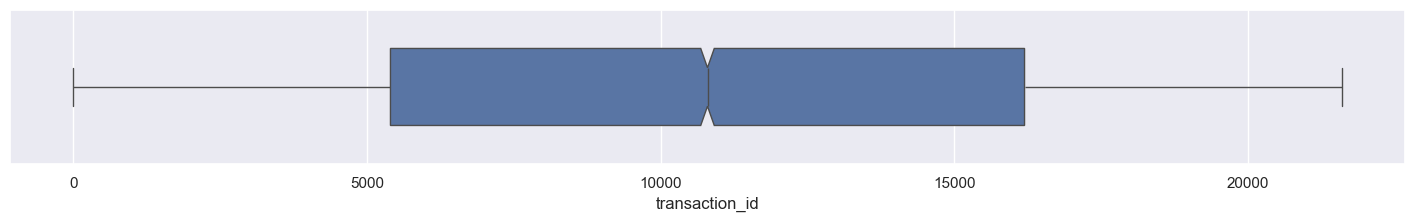

In [84]:
# Using a loop to plot all data. --> Check if there is a better option.
for column in df.columns:
    plt.figure(figsize=(18, 2))
    sns.boxplot(x=df[column], width=0.5, notch=True)
plt.show()

##### The plots provided a rough overview of the data. Some data is categorical which is easily visible.  
##### Furthermore, some outliing data points were made visible. I had a closer look at some, but in the end I decided to not remove them, because their influence on the whole data set seemed to be marginal. Addionally, I had no chance to investigate if some data points are fake/errors or if they are real and just abberations.  
---



##### First, I created a correlation matrix of some columns I deemed to be interesting. The visualisation of this data beame the first figure (only a sup figure).

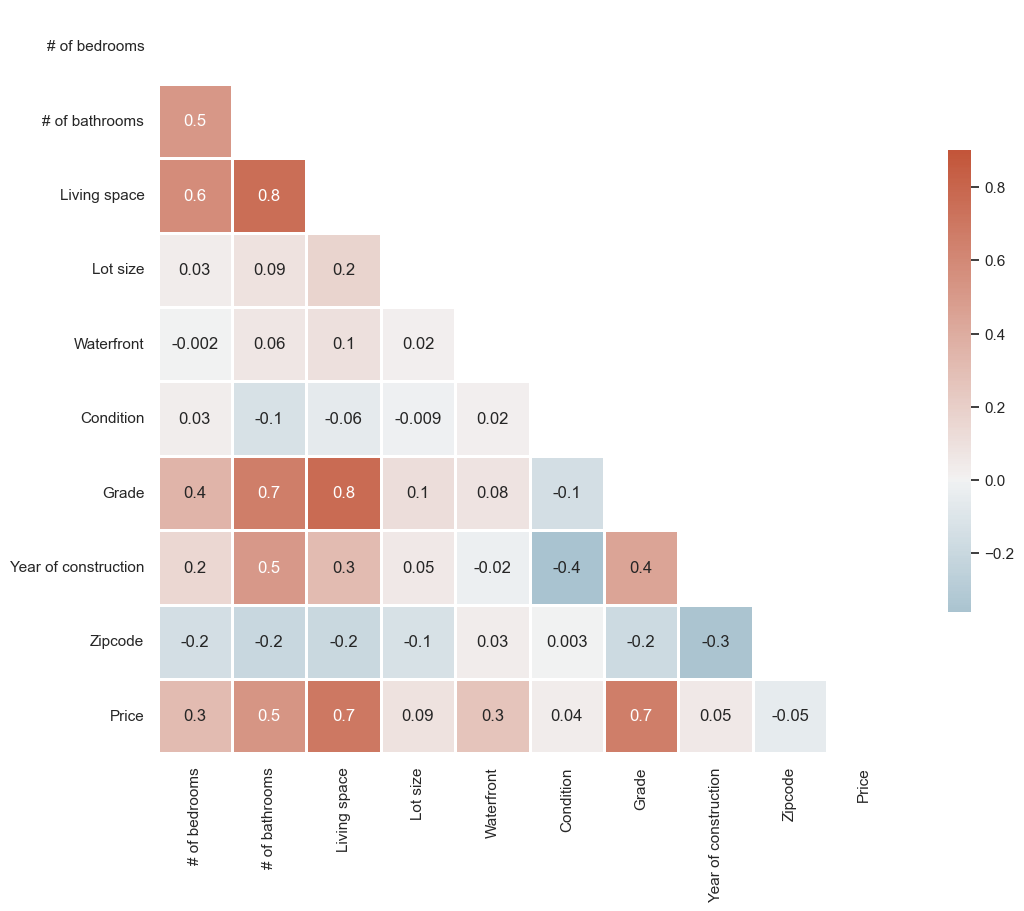

In [320]:
# Create sub-dataframe for correlation data and rename columns, so the output looks nicer.
df_corr = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode', 'price']]
df_corr.columns = ["# of bedrooms", "# of bathrooms", "Living space", "Lot size", "Waterfront", "Condition", "Grade", "Year of construction", "Zipcode", "Price"]
corrM = df_corr.corr()

# Code for the plotting was modified from the seaborn website
# Generate a mask for the upper triangle
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corrM, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corrM, annot=True, fmt='.1g', mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})
plt.savefig('heatmap.png')

##### Next, I want to investigate, if there is a nice visual correlation between the size of the lot and the size of the living space

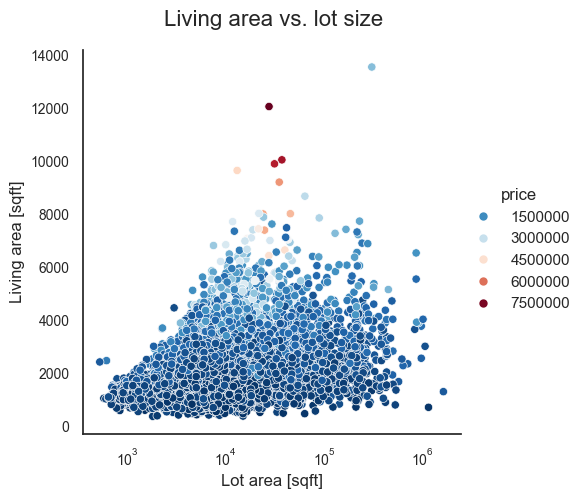

In [412]:
# ---Plot 1---

# Create sub-dataframe for plot data
plot1_data = df[["sqft_lot", "sqft_living", "price"]]

# Plot data as a scatterplot with the price as a color marker. 
g = sns.relplot(data=plot1_data, x='sqft_lot', y='sqft_living', hue='price', palette='RdBu_r') 
g.set_axis_labels("Lot area [sqft]", "Living area [sqft]", fontsize=12) 
g.set(xscale="log")
g.fig.suptitle('Living area vs. lot size', fontsize=16) 
g.tick_params(labelsize=10) 
g.fig.subplots_adjust(top=0.9)
g.savefig('plot1.png')

##### The plot looks okay, but it has sup potential at best.  
---  
##### After that, I wanted to tackle my first proposed hypothesis. Are properties which have a larger lot size more expensive?

C:\Users\Roland\AppData\Local\Temp\ipykernel_1200\2342674560.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



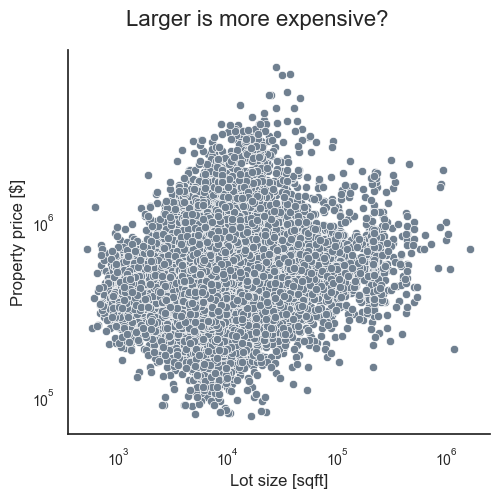

In [388]:
# ---Plot 2---
# Create sub-dataframe for plot data
plot2_data = df[["sqft_lot", "price"]]
plot2_data['log_lot'] = np.log10(plot2_data['sqft_lot'])

# Plot data as a scatterplot
g = sns.relplot(data=plot2_data, x='sqft_lot', y='price', color="slategrey")
g.set_axis_labels("Lot size [sqft]", "Property price [$]", fontsize=12) 
g.set(xscale="log")
g.set(yscale="log")
g.fig.suptitle('Larger is more expensive?', fontsize=16) 
g.tick_params(labelsize=10) 
g.fig.subplots_adjust(top=0.9) 
g.savefig('plot2.png')

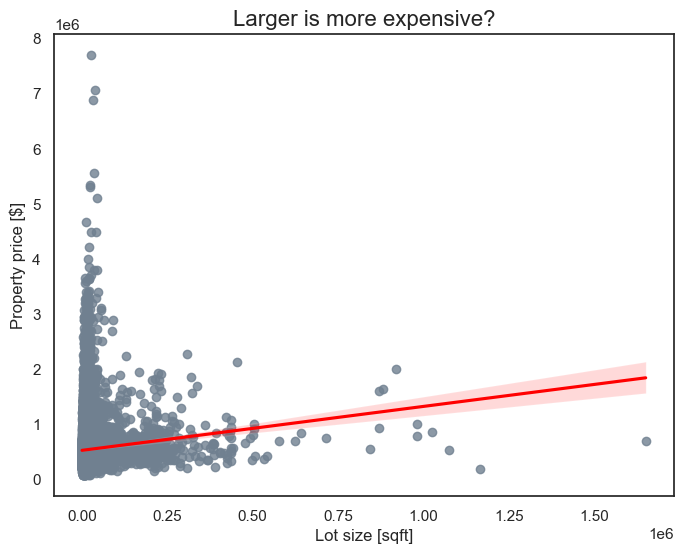

In [385]:
# ---Plot 2_1---
# Scatterplot with a regression line, both axis are linear scaled
plt.figure(figsize=(8, 6))
sns.regplot(x = "sqft_lot", 
            y = "price", 
            data = plot2_data,
            scatter_kws={"color": "slategrey"}, 
            line_kws={"color": "red"})
plt.xlabel("Lot size [sqft]", size=12)
plt.ylabel("Property price [$]", size=12)
plt.title("Larger is more expensive?", size=16)
plt.savefig('plot2_1.png')

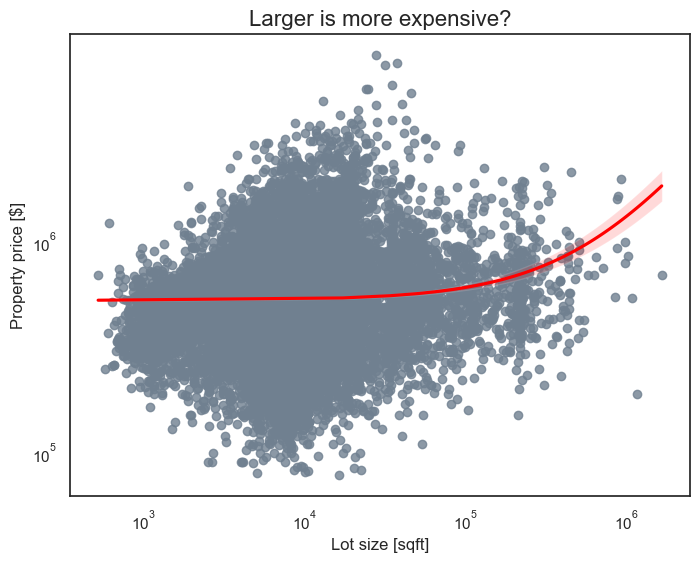

In [383]:
# ---Plot 2_2---
# Scatterplot with a regression line, both axis are log-scales
plt.figure(figsize=(8, 6))
sns.regplot(x = "sqft_lot", 
            y = "price", 
            data = plot2_data,
            scatter_kws={"color": "slategrey"}, 
            line_kws={"color": "red"})
plt.xlabel("Lot size [sqft]", size=12)
plt.ylabel("Property price [$]", size=12)
plt.title("Larger is more expensive?", size=16)
plt.xscale("log")
plt.yscale("log")
plt.savefig('plot2_2.png')

In [386]:
plot2_corr_data = plot2_data.copy()
plot2_corr_data['log_price'] = np.log10(plot2_corr_data['price'])
plot2_corr = plot2_corr_data.corr()
plot2_corr

,sqft_lot,price,log_lot,log_price
sqft_lot,1.000000,0.089876,0.638608,0.100025
price,0.089876,1.000000,0.161561,0.891745
log_lot,0.638608,0.161561,1.000000,0.138261
log_price,0.100025,0.891745,0.138261,1.000000


##### All three plots could not show a striking correlation between lot size and price of the property. To ensure that the visuals are not misleading, I did a correlation calculation with the plot data, which is shown above. Again, the correlation factor between lot size and price is low, the same is true for the correaltion between every combination of logarithmized data.  
---
##### I did a quick visual check if there is a connection visible, if lots are largern than 11000 sqft, but it's not.

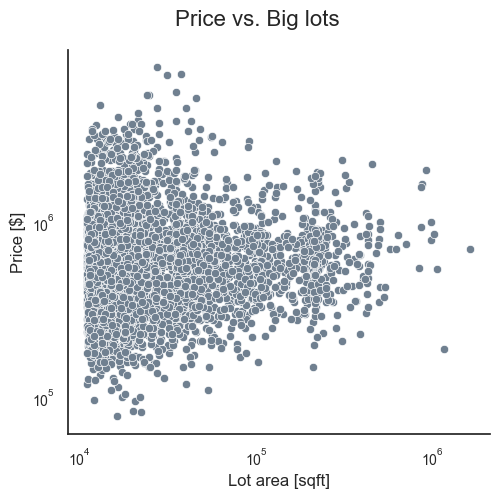

In [199]:
# ---Plot3---
# Create sub-dataframe for plot data
plot3_data = df[["sqft_lot", "price"]]
plot3_data = plot3_data.query("sqft_lot >= 11000") # Perhaps, this can be done more elegantly within the plot statement.

# Scatterplot
g = sns.relplot(data=plot3_data, x='sqft_lot', y='price', color='slategrey')
g.set_axis_labels("Lot area [sqft]", "Property price [$]", fontsize=12) 
g.set(xscale="log")
g.set(yscale="log")
g.fig.suptitle('Price vs. Big lots', fontsize=16) 
g.tick_params(labelsize=10) 
g.fig.subplots_adjust(top=0.9)
g.savefig('plot3.png')



##### Now, my second hypothesis was tested. Are properties with historic buildings selling for more money than properties with newly built houses? (Historic houeses were defined as being built before 1975, since this label means they need to be at least 50 years old. Everything else was considered as "newly built".

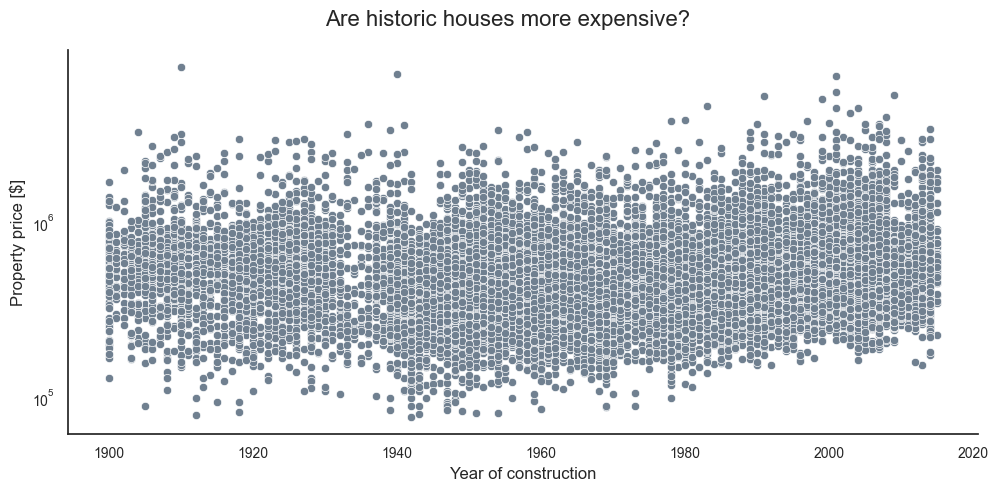

In [326]:
# ---Plot 4---
# Create sub-dataframe for plot data
plot4_data = df[["yr_built", "price"]]

# Scatterplot for the whole timeframe
g = sns.relplot(data=plot4_data, x='yr_built', y='price', color='slategrey', height=5, aspect=2)
g.set_axis_labels("Year of construction", "Property price [$]", fontsize=12) 
g.set(yscale="log")
g.fig.suptitle('Are historic houses more expensive?', fontsize=16)
g.tick_params(labelsize=10) 
g.fig.subplots_adjust(top=0.9)
g.savefig('plot4.png')

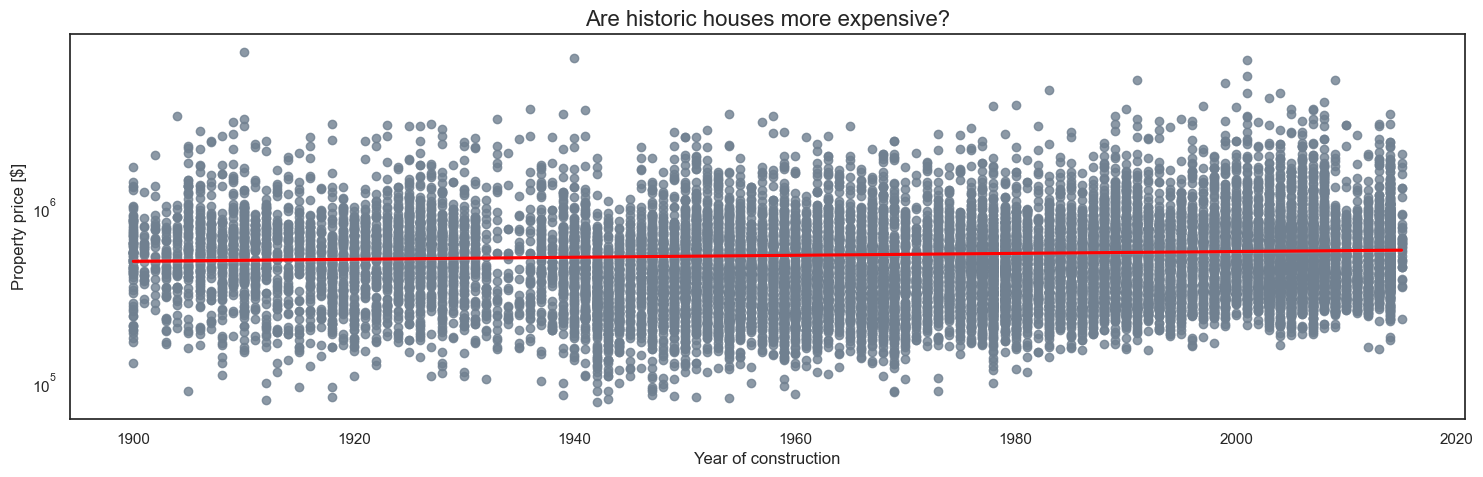

In [396]:
# ---Plot 4_1---
plot4_data = df[["yr_built", "price"]]
plt.figure(figsize=(18, 5))
sns.regplot(x = "yr_built", 
            y = "price", 
            data = plot4_data,
            scatter_kws={"color": "slategrey"}, 
            line_kws={"color": "red"})
plt.xlabel("Year of construction", size=12)
plt.ylabel("Property price [$]", size=12)
plt.title('Are historic houses more expensive?', size=16)
plt.yscale("log")
plt.savefig('plot4_1.png')

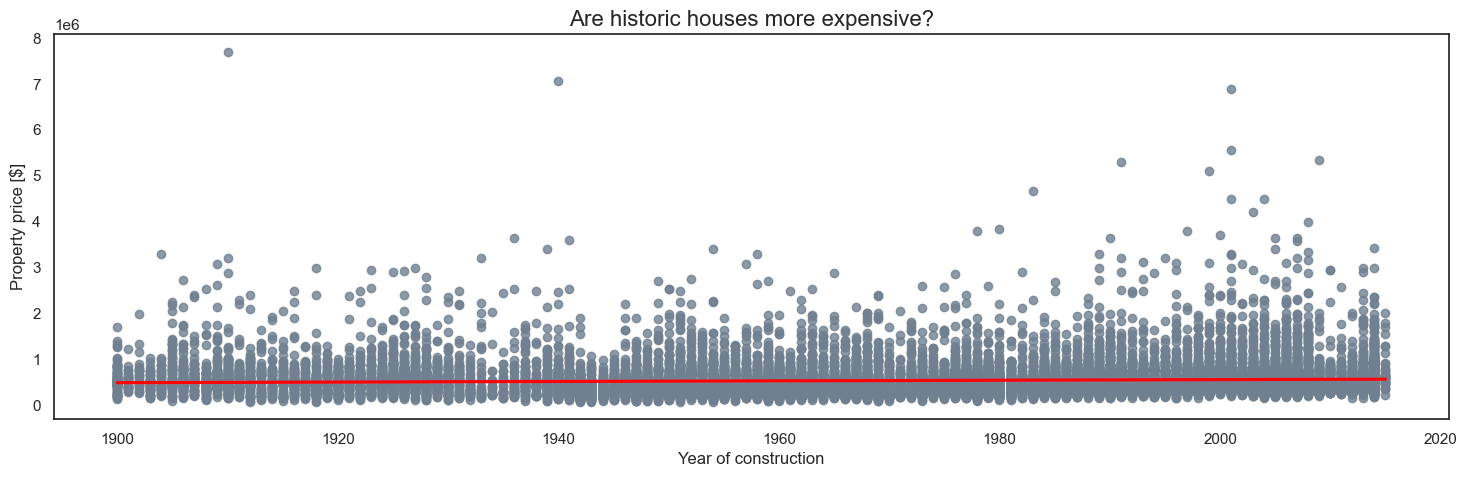

In [397]:
# ---Plot 4_2---
plot4_data = df[["yr_built", "price"]]
plt.figure(figsize=(18, 5))
sns.regplot(x = "yr_built", 
            y = "price", 
            data = plot4_data,
            scatter_kws={"color": "slategrey"}, 
            line_kws={"color": "red"})
plt.xlabel("Year of construction", size=12)
plt.ylabel("Property price [$]", size=12)
plt.title('Are historic houses more expensive?', size=16)
plt.savefig('plot4_2.png')

In [399]:
plot4_corr_data = plot4_data.copy()
plot4_corr_data['log_price'] = np.log10(plot4_corr_data['price'])
plot4_corr = plot4_corr_data.corr()
plot4_corr

,yr_built,price,log_price
yr_built,1.000000,0.053953,0.080583
price,0.053953,1.000000,0.891745
log_price,0.080583,0.891745,1.000000


##### All three plots show a slight trend that properties with newly built houses sell for more money, but there is no correlation detectable over the whole timeframe. The correlation analysis backs this statement.
---
##### I split the plot to only show one of both subgroups in each figure. The plots look okay, but they are sup material.

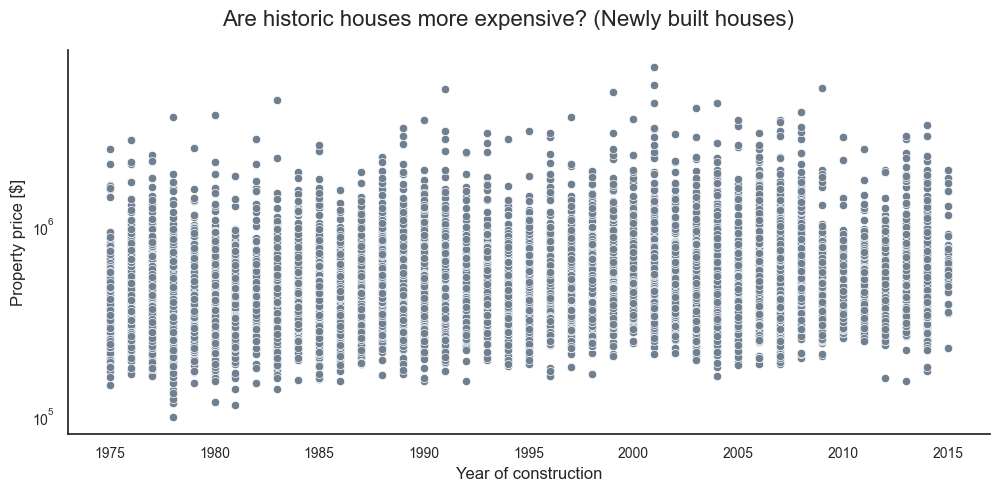

In [327]:
# ---Plot 5---
plot5_data = df[["yr_built", "price"]]
plot5_data = plot5_data.query('yr_built >= 1975')

g = sns.relplot(data=plot5_data, x='yr_built', y='price', color='slategrey', height=5, aspect=2)
g.set_axis_labels("Year of construction", "Property price [$]", fontsize=12) 
g.set(yscale="log")
g.fig.suptitle('Are historic houses more expensive? (Newly built houses)', fontsize=16) 
g.tick_params(labelsize=10) 
g.fig.subplots_adjust(top=0.9) 
g.savefig('plot5.png')

In [413]:
plot5_data = df[["yr_built", "price"]]
plot5_data = plot5_data.query('yr_built >= 1975')
plot5_corr = plot5_data.corr()
plot5_corr

,yr_built,price
yr_built,1.000000,0.124491
price,0.124491,1.000000


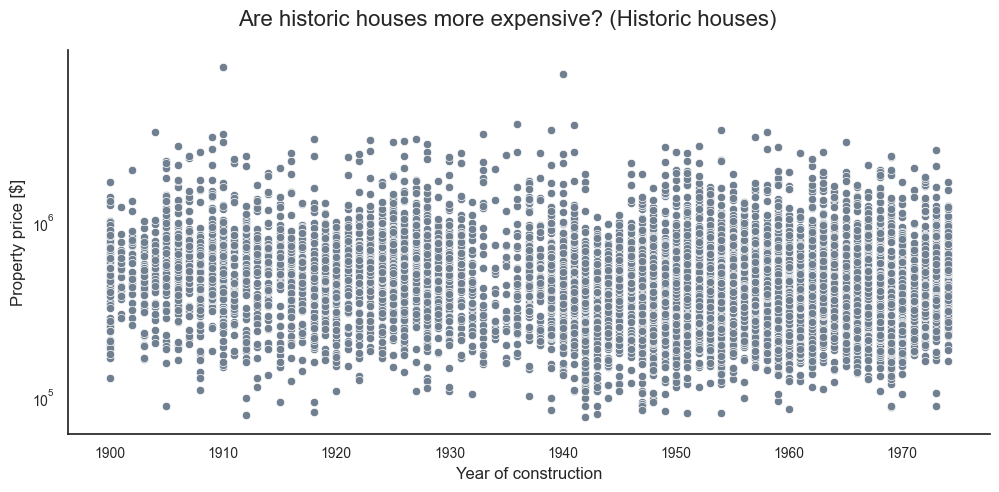

In [328]:
# ---Plot 6---
plot6_data = df[["yr_built", "price"]]
plot6_data = plot6_data.query('yr_built < 1975')

g = sns.relplot(data=plot6_data, x='yr_built', y='price', color='slategrey', height=5, aspect=2)
g.set_axis_labels("Year of construction", "Property price [$]", fontsize=12) 
g.set(yscale="log")
g.fig.suptitle('Are historic houses more expensive? (Historic houses)', fontsize=16) 
g.tick_params(labelsize=10) 
g.fig.subplots_adjust(top=0.9)
g.savefig('plot6.png')

In [414]:
plot5_data = df[["yr_built", "price"]]
plot5_data = plot5_data.query('yr_built >= 1975')
plot5_data.mean()

yr_built      1995.345460
price       574013.106281
dtype: float64

In [217]:
plot6_data = df[["yr_built", "price", "bedrooms", "bathrooms"]]
plot6_data = plot6_data.query('yr_built < 1975')
plot6_data.mean()

yr_built       1946.384114
price        506206.424248
bedrooms          3.263898
bathrooms         1.718852
dtype: float64

##### After splitting the data into the historic and the newly built group and calculation the mean of the price, I realized there is a difference.  
---
##### That's why I provisionally calculated and independed two sided t-test of the data. It states that there is a significant difference in the property price of the groups.

In [219]:
from scipy.stats import ttest_ind
ttest_ind(plot5_data['price'], plot6_data['price'])


TtestResult(statistic=np.float64(13.620042049969209), pvalue=np.float64(4.542734621461421e-42), df=np.float64(21595.0))

##### Therefore I created a simple bar plot to demonstrate the difference.

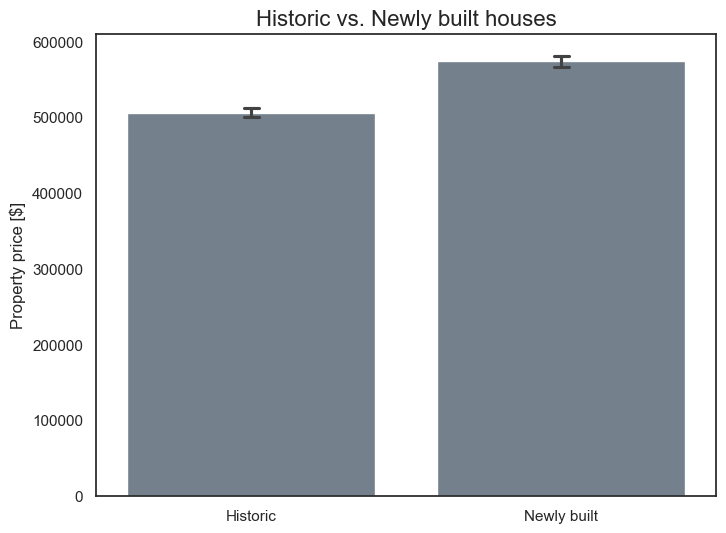

In [348]:
# ---Plot 7---

# 95% confidence intervall as error bars
plot7_data = df
plot7_data.loc[plot7_data.yr_built >= 1975, "state"] = "Newly built"
plot7_data.loc[plot7_data.yr_built < 1975, "state"] = "Historic"
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.barplot(data=plot7_data, x="state", y="price", errorbar=('ci', 95), capsize=0.05, color="slategrey")
g.axes.set_title("Historic vs. Newly built houses", fontsize=16)
g.set_xlabel("",fontsize=12)
g.set_ylabel("Property price [$]", fontsize=12)
plt.savefig('plot7.png')

##### Using the knowledge about the outcome of the preceding hypothsis, I tackled the third one. Are well maintained properties worth more than badly maintained ones? The criterium for this would be the condition data column.  
##### I plotted the property value versus each condtion category as a bar plot and as a box plot.

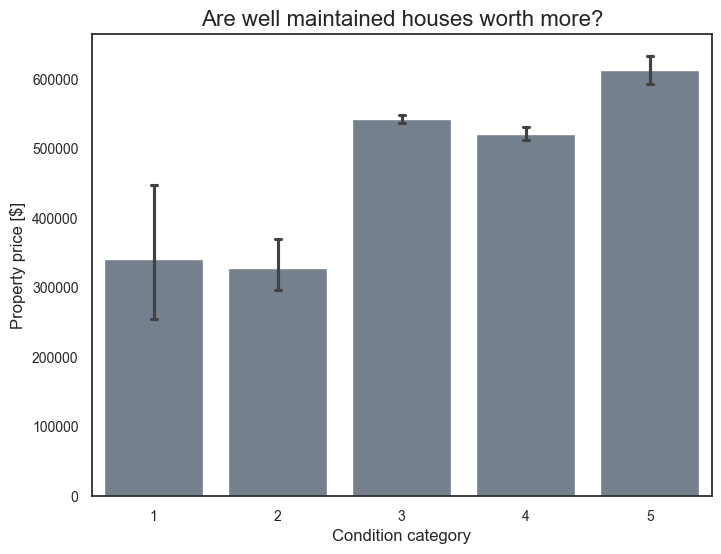

In [350]:
# ---Plot 8---

# 95% confidence intervall as error bars
plot8_data = df
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.barplot(data=plot8_data, x="condition", y="price", errorbar=('ci', 95), capsize=0.05, color="slategrey")
g.axes.set_title("Are well maintained houses worth more?", fontsize=16)
g.set_xlabel("Condition category",fontsize=12)
g.set_ylabel("Property price [$]", fontsize=12)
g.tick_params(labelsize=10)
plt.savefig('plot8.png')

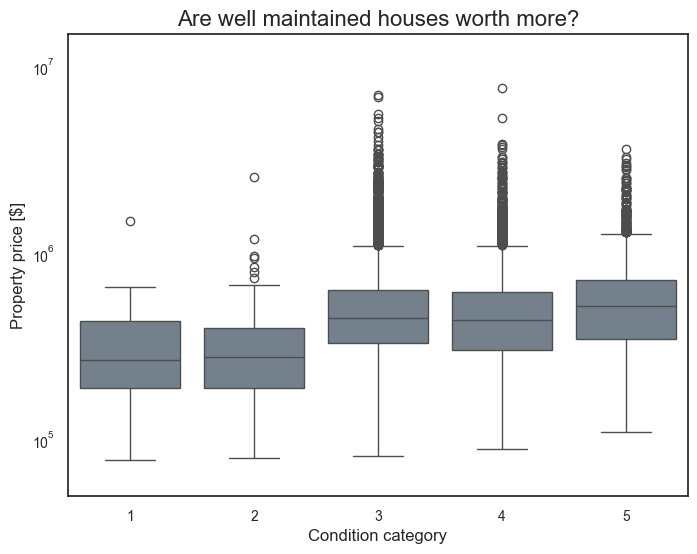

In [351]:
# ---Plot 9---
plot9_data = df
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.boxplot(x="condition", y="price", data=plot9_data, color="slategrey")
g.set_yscale("log")
g.set_ylim([50000, 15000000])
g.axes.set_title("Are well maintained houses worth more?", fontsize=16)
g.set_xlabel("Condition category",fontsize=12)
g.set_ylabel("Property price [$]", fontsize=12)
g.tick_params(labelsize=10)
plt.savefig('plot9.png')

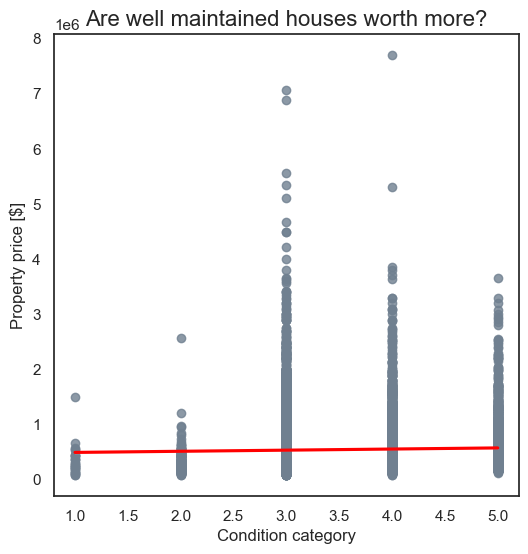

In [404]:
# ---Plot 8_1---
plot8_data = df

plt.figure(figsize=(6, 6))
sns.regplot(x = "condition", 
            y = "price", 
            data = plot8_data,
            scatter_kws={"color": "slategrey"}, 
            line_kws={"color": "red"})
plt.xlabel("Condition category", size=12)
plt.ylabel("Property price [$]", size=12)
plt.title('Are well maintained houses worth more?', size=16)
# plt.yscale("log")
plt.savefig('plot8_1.png')

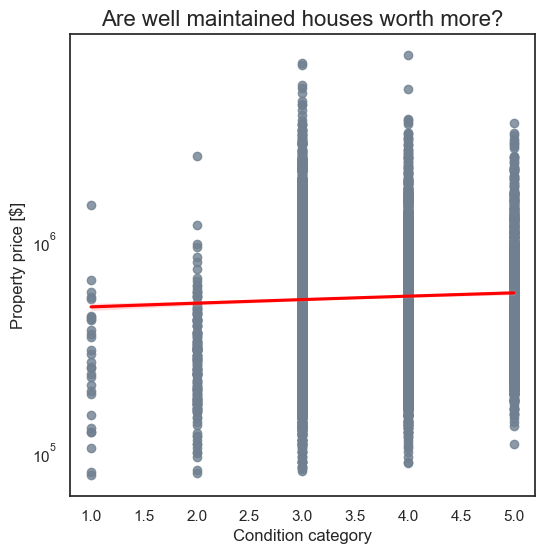

In [405]:
# ---Plot 8_2---
plot8_data = df

plt.figure(figsize=(6, 6))
sns.regplot(x = "condition", 
            y = "price", 
            data = plot8_data,
            scatter_kws={"color": "slategrey"}, 
            line_kws={"color": "red"})
plt.xlabel("Condition category", size=12)
plt.ylabel("Property price [$]", size=12)
plt.title('Are well maintained houses worth more?', size=16)
plt.yscale("log")
plt.savefig('plot8_2.png')

In [410]:
plot8_corr_data = plot8_data[['price', 'condition']]
plot8_corr_data['log_price'] = np.log10(plot8_corr_data['price'])
plot8_corr = plot8_corr_data.corr()
plot8_corr

C:\Users\Roland\AppData\Local\Temp\ipykernel_1200\1922844773.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,price,condition,log_price
price,1.000000,0.036056,0.891745
condition,0.036056,1.000000,0.038918
log_price,0.891745,0.038918,1.000000


##### Additionally, I plotted the data as scatterplot with trendlines. Again, while there is a slight trend visible, the correlation data does not back this trend considering all categories.  
##### However, looking at the bar plots, it is clearly visible that there are differences between some groups. This again is an example that (sub-)groups/subsets may differ, even if there is no clear trend over the whole dataset.  
##### To test the significance between the subgroups further statistical test are necessary (ANOVA maybe?).

---
##### The next two plots show the relation between the price of the properties and the number of bathrooms in the house. I did this for fun and to have a transition to my client, because he defines his property by the number of bathrooms and not by the number of bedrooms. I did not test any hypothesis with this, but there is a clear correlation between the data (categories).

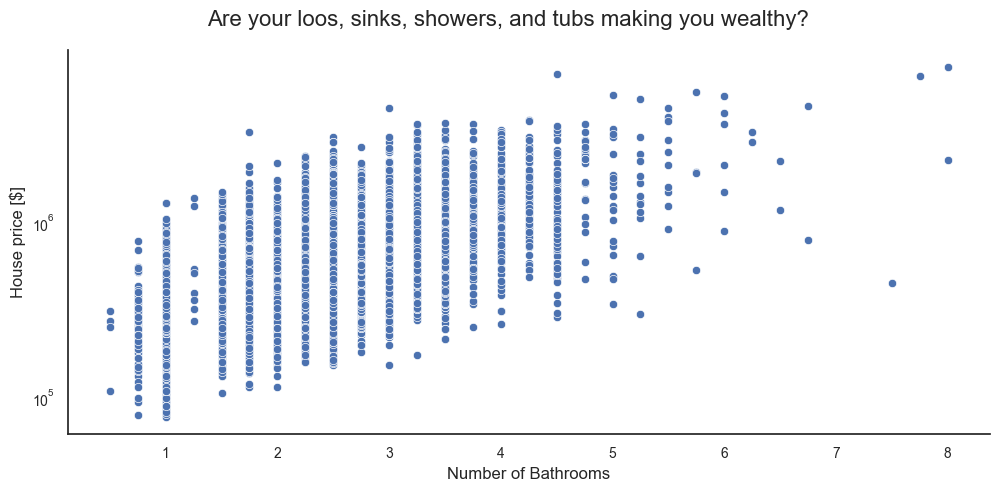

In [296]:
# ---Plot 10---
plot10_data = df
g = sns.relplot(data=plot10_data, x='bathrooms', y='price', height=5, aspect=2)
g.set_axis_labels("Number of Bathrooms", "Property price [$]", fontsize=12) # Renames axis labels and sets their fontsize, could be done individually
# g._legend.texts[0].set_text("Year") # changes text in legend (counted from top to bottom, starting with 0)
# g._legend.texts[5].set_text("Maximum \ntemperature") # same, not line break ;)
g.set(yscale="log")
g.fig.suptitle("Are your loos, sinks, showers, and tubs making you wealthy?", fontsize=16) # sets plot title and its fontsize
g.tick_params(labelsize=10) # sets fontsize of numbers on axis
g.fig.subplots_adjust(top=0.9) # shifts plot title around (how?)
g.savefig('plot10.png')

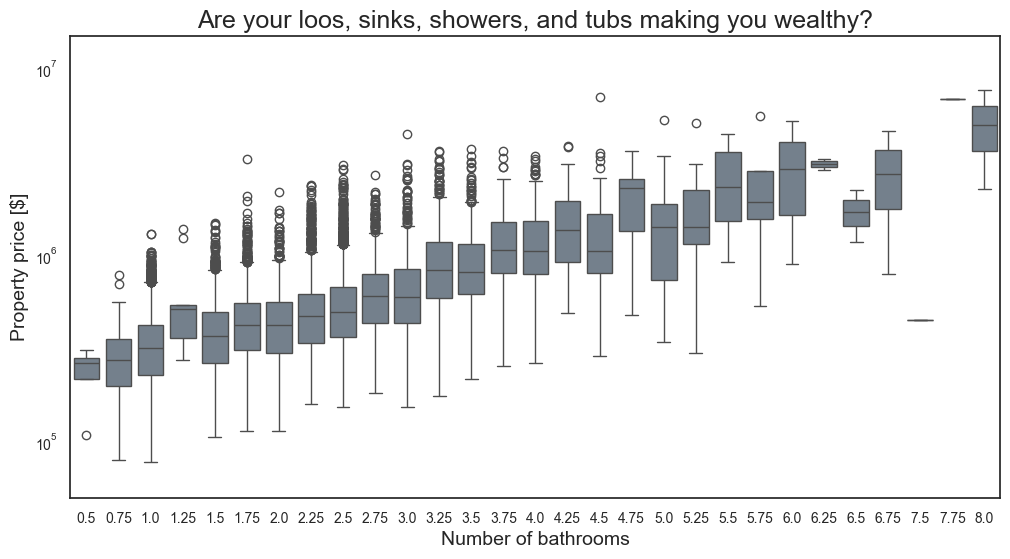

In [352]:
# ---Plot 11---
plot11_data = df
plt.figure(figsize=(12, 6))
g = sns.boxplot(x="bathrooms", y="price", data=plot11_data, color="slategrey")
g.set_yscale("log")
g.set_ylim([50000, 15000000])
g.axes.set_title("Are your loos, sinks, showers, and tubs making you wealthy?", fontsize=18)
g.set_xlabel("Number of bathrooms",fontsize=14)
g.set_ylabel("Property price [$]", fontsize=14)
g.tick_params(labelsize=10)
plt.savefig('plot11.png')

##### This part of the repo provided a closer look at the real estate data. Moreover, plots were created to visualize the whole data and specifically certain parts of it. The three proposed hypothesis about the dataset were addressed and each arising question was answered with plots and/or statistical tests.